In [77]:
import yaml
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dateparser

In [4]:
HERE = Path(".").resolve()
DATA_PATH = HERE.parent.joinpath("docs", "_data", "health.yaml").resolve()
DATA_PATH

PosixPath('/Users/cthoyt/dev/bioregistry/docs/_data/health.yaml')

In [7]:
with DATA_PATH.open() as file:
    data = yaml.safe_load(file)

In [11]:
d = data['runs']
len(d)

29

In [86]:
df = pd.DataFrame.from_dict(
    {
        dateparser.parse(record["date"]): record["summary"]
        for record in d
    },
    orient="index"
)
df.index.name = "date"
df.head()

,failure_percent,total_failed,total_measured,total_success
date,,,,
2023-03-19,26.4,373,1412,1039
2023-03-12,26.9,379,1410,1031
2023-03-05,26.3,369,1404,1035
2023-02-26,26.0,364,1400,1036
2023-02-19,26.4,369,1396,1027


TimedeltaIndex(['158 days', '151 days', '144 days', '137 days', '130 days',
                '123 days', '116 days', '109 days', '102 days',  '95 days',
                 '88 days',  '81 days',  '74 days',  '67 days',  '60 days',
                 '53 days',  '46 days',  '39 days',  '32 days',  '25 days',
                 '18 days',  '11 days',   '4 days',   '0 days'],
               dtype='timedelta64[ns]', name='date', freq=None)

In [102]:
df_smooth = df.rolling(3).mean()
df_smooth = df_smooth[df_smooth.failure_percent.notna()]
df_smooth["delta"] = (df_smooth.index - df_smooth.index.min()).map(lambda d: d.days)
df_smooth

,failure_percent,total_failed,total_measured,total_success,delta
date,,,,,
2023-03-05,26.533333,373.666667,1408.666667,1035.000000,158
2023-02-26,26.400000,370.666667,1404.666667,1034.000000,151
2023-02-19,26.233333,367.333333,1400.000000,1032.666667,144
2023-02-12,26.233333,366.333333,1396.666667,1030.333333,137
2023-02-05,26.333333,367.000000,1394.000000,1027.000000,130
2023-01-29,26.266667,365.333333,1392.333333,1027.000000,123
2023-01-22,26.800000,372.666667,1391.333333,1018.666667,116
2023-01-15,27.766667,385.666667,1390.333333,1004.666667,109
2023-01-08,27.933333,387.666667,1389.333333,1001.666667,102


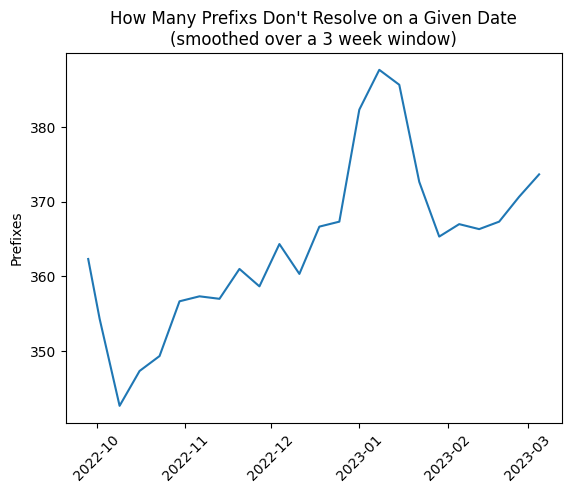

In [111]:
ax = sns.lineplot(data=df_smooth, x=df_smooth.index, y="total_failed")
plt.xticks(rotation=45)
plt.title("How Many Prefixs Don't Resolve on a Given Date\n(smoothed over a 3 week window)")
plt.ylabel("Prefixes")
plt.xlabel("")
plt.show()